In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def minvarwts(myuv,m,C):
  m=np.array(m)
  n=len(m)
  u=np.array(np.ones(n))
  uT=u.reshape(-1,1)
  C_inv=np.linalg.inv(C)
  mT=m.reshape(-1,1)
  a=u@C_inv@(uT)
  b=u@C_inv@(mT)
  c=m@C_inv@(uT)
  d=m@C_inv@(mT)

  p=d-myuv*b
  q=a*myuv-c
  r=a*d-b*c
  w=(p*(u@C_inv)+q*(m@C_inv))/r

  return np.array(w)



In [ ]:
M=[0.1,0.2,0.15]
M=np.array(M)
C=[[0.005,-0.010,0.004],[-0.010,0.040,-0.002],[0.004 ,-0.002,0.023]]
C=np.array(C)
C12=C[[0,1]][:,[0,1]]
M12=M[0:2]
C23=C[[1,2]][:,[1,2]]
M23=M[1:3]
C13=C[[0,2]][:,[0,2]]
M13=M[[0,2]]
print(C12)
print(C23)
print(C13)
print(M12)
print(M23)
print(M13)

[[ 0.005 -0.01 ]
 [-0.01   0.04 ]]
[[ 0.04  -0.002]
 [-0.002  0.023]]
[[0.005 0.004]
 [0.004 0.023]]
[0.1 0.2]
[0.2  0.15]
[0.1  0.15]


In [ ]:
def minvarline(M,C):
  risk=[]
  weights=[]
  testreturns=np.arange(0,0.8,0.001)
  returns=[]
  for myu in testreturns:

    w=minvarwts(myu,M,C)
    if np.all(w>0):
      weights.append(w)
      sigma=np.power((w)@(C)@(w.T),0.5)
      returns.append(myu)
      risk.append(sigma)

  weights=np.array(weights)
  return risk,returns,weights



In [ ]:
riskall,returnsall,weightsall=minvarline(M,C)

In [ ]:
risk1,returns1,weights1=minvarline(M23,C23)
risk2,returns2,weights2=minvarline(M13,C13)
risk3,returns3,weights3=minvarline(M12,C12)

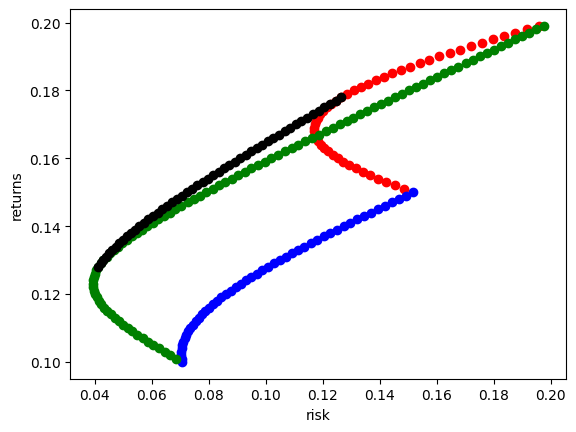

In [ ]:
plt.scatter(risk1,returns1,color='red')
plt.scatter(risk2,returns2,color='blue')
plt.scatter(risk3,returns3,color='green')
plt.scatter(riskall,returnsall,color='black')
plt.xlabel('risk')
plt.ylabel('returns')
plt.show()

In [ ]:
print(weightsall[1])

[0.70422018 0.28422018 0.01155963]


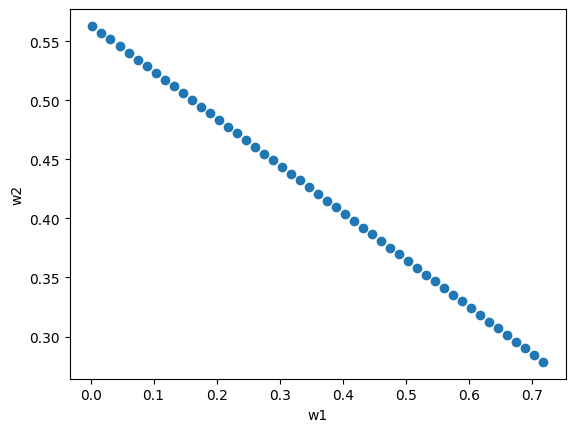

In [ ]:
plt.xlabel('w1')
plt.ylabel('w2')
plt.scatter(weightsall[:,0],weightsall[:,1])
plt.show()

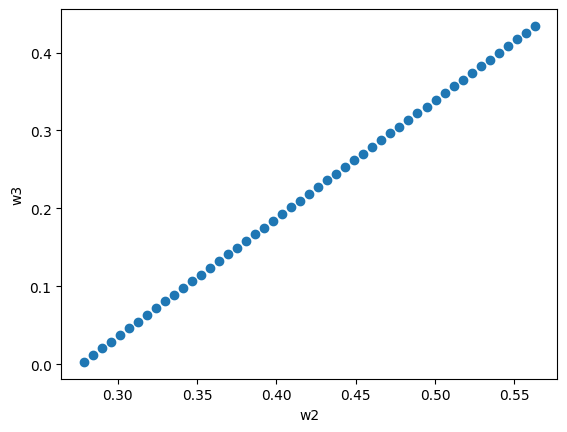

In [ ]:
plt.xlabel('w2')
plt.ylabel('w3')
plt.scatter(weightsall[:,1],weightsall[:,2])
plt.show()

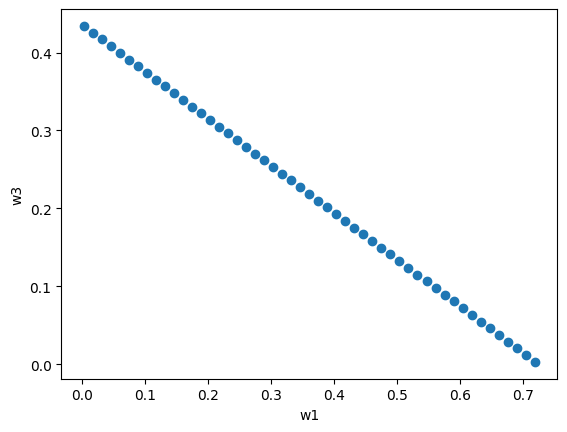

In [ ]:
plt.xlabel('w1')
plt.ylabel('w3')
plt.scatter(weightsall[:,0],weightsall[:,2])
plt.show()